In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('Ames_Housing_Clean_Data_no_remove_skew.csv')

## adjusting skewed feature

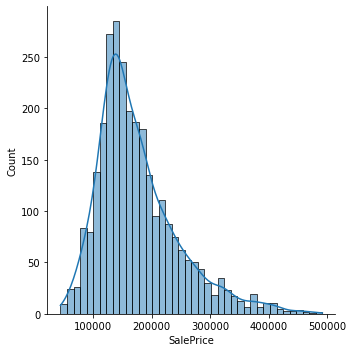

In [3]:
sns.displot(data=df,x='SalePrice',kde=True);

In [4]:
df['SalePrice'].skew()

1.226112963757501

In [5]:
df['SalePrice']=np.sqrt(df['SalePrice'])

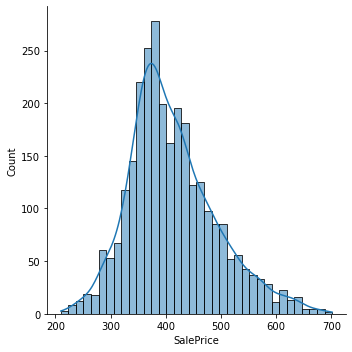

In [6]:
sns.displot(data=df,x='SalePrice',kde=True);

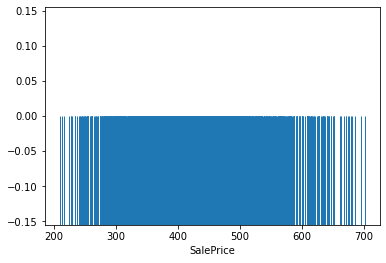

In [7]:
sns.rugplot(x='SalePrice',data=df,height=0.5);

# observe if there is any outliers within SalePrice itself so we had some information on which dataset to look on
# sale price above 700000 seems like an outliers

In [8]:
x=df.drop(['SalePrice'],axis=1)
y=df['SalePrice']

## MODEL 1 - LINEAR REGRESSION

**Train | Test Split**

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=101)

In [11]:
x_train

,Lot Frontage,Lot Area,Lot Shape,Land Slope,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,Exter Qual,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_VWD,SaleType_WD,SaleCond_AdjLand,SaleCond_Alloca,SaleCond_Family,SaleCond_Normal,SaleCond_Partial
2042,78.000000,9317,1,0,6,5,2006,2006,0.0,1,...,0,0,0,0,1,0,0,0,1,0
1920,40.000000,3880,0,0,5,9,1945,1997,0.0,2,...,0,0,0,0,1,0,0,0,1,0
938,78.870370,6853,1,0,8,5,2001,2002,136.0,1,...,0,0,0,0,1,0,0,0,1,0
824,67.000000,16285,2,0,7,5,2001,2002,0.0,1,...,0,0,0,0,1,0,0,0,1,0
90,25.000000,4835,1,0,7,5,2004,2005,0.0,1,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
599,80.000000,9600,0,0,5,7,1950,2007,0.0,1,...,0,0,0,0,1,0,0,0,1,0
1599,80.000000,11584,0,0,7,6,1979,1979,96.0,2,...,0,0,0,0,1,0,0,0,1,0
1361,85.176471,2887,0,0,6,5,1996,1997,0.0,2,...,0,0,0,0,1,0,0,0,1,0
1547,21.000000,1596,0,0,4,6,1973,1973,0.0,2,...,0,0,0,0,1,0,0,0,1,0


In [12]:
len(x_train)

1984

In [13]:
len(x_test)

851

**Create an Estimator**

In [14]:
from sklearn.linear_model import LinearRegression

In [15]:
model=LinearRegression()

In [16]:
model.fit(x_train,y_train)

LinearRegression()

In [17]:
test_pred=model.predict(x_test)

In [18]:
y_test

1234    398.748041
1249    396.862697
1871    339.116499
80      334.664011
917     273.861279
           ...    
759     287.228132
660     344.818793
2118    334.664011
1067    500.000000
38      539.389470
Name: SalePrice, Length: 851, dtype: float64

In [19]:
test_pred

array([406.40473058, 392.06261863, 345.78370682, 346.64430965,
       260.89633669, 394.74553435, 546.8262674 , 411.79957119,
       479.85013647, 366.4028896 , 422.45122315, 507.20743283,
       339.46542622, 362.07590764, 400.1377628 , 309.54701601,
       650.38065961, 275.93793671, 359.42535348, 372.73252216,
       487.78057027, 530.28977025, 367.77412139, 401.9467057 ,
       294.10734644, 484.05769457, 556.315236  , 314.57886446,
       412.67199843, 405.32754968, 379.68482793, 319.99693094,
       427.65686959, 369.51232194, 388.82069418, 474.76195519,
       604.33382899, 408.86016757, 284.071697  , 298.60262487,
       285.26309192, 302.31937172, 422.4736446 , 481.12301053,
       516.98408259, 450.04020476, 524.15420961, 374.60150601,
       354.87512181, 363.56086669, 496.66002734, 410.57095311,
       335.12530591, 388.15095671, 497.80256515, 439.22906782,
       291.60164626, 503.82440328, 467.030768  , 336.19571378,
       416.17839809, 405.08972567, 358.87019063, 369.84

**Test 1 - MAE, MSE, RMSE**

In [20]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [21]:
MAE=mean_absolute_error(y_test,test_pred)

MAE**2

217.21506155626633

In [22]:
MSE = mean_squared_error(y_test,test_pred)

MSE = MSE**2

MSE

152932.48110013394

In [23]:
RMSE= np.sqrt(MSE)

RMSE

391.0658270676868

In [24]:
#predict on train set

train_pred=model.predict(x_train)

MSE = mean_squared_error(y_train,train_pred)
MSE = MSE**2
RMSE= np.sqrt(MSE)
RMSE

339.78603927609964

If the RMSE for the test set is much higher than that of the training set, it is likely that you've badly over fit the data, i.e. you've created a model that tests well in sample, but has little predictive value when tested out of sample.

In [25]:
df['SalePrice'].mean()**2

169955.60105924687

In [26]:
RMSE*100/df['SalePrice'].mean()**2

0.1999263555648569

0.2% percent of error percentage for predicting sales price

In [27]:
from sklearn.metrics import r2_score

In [28]:
accuracy= round(r2_score(y_test, test_pred), 2)

accuracy

0.94

**Test 2 - Residual Plot and Distribution Plot**

In [29]:
test_res=y_test-test_pred

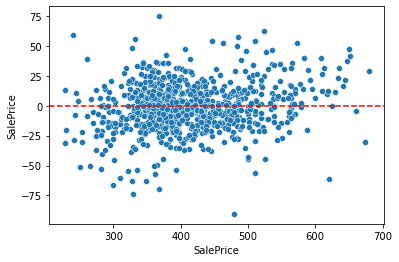

In [30]:
sns.scatterplot(x=y_test,y=test_res)
plt.axhline(y=0,color='red',linestyle='--');

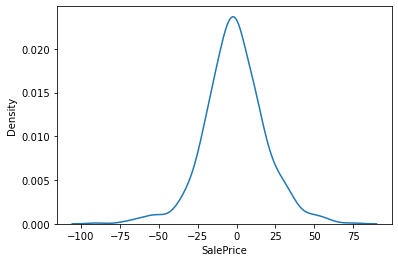

In [31]:
sns.kdeplot(test_res);

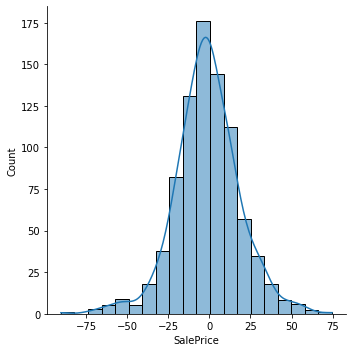

In [32]:
sns.displot(test_res,bins=20,kde=True);

**Test 3 - Probability Plot**

In [33]:
import scipy as sp

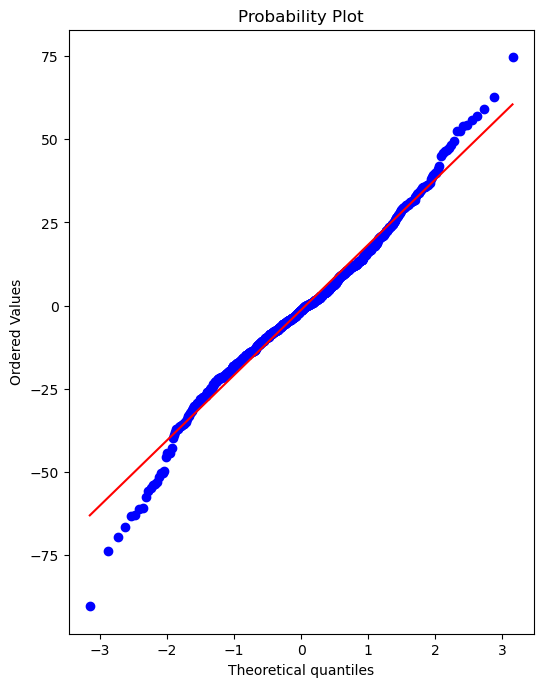

In [34]:
fig,ax=plt.subplots(figsize=(6,8),dpi=100)

_=sp.stats.probplot(test_res,plot=ax)


In [35]:
model.coef_

array([ 3.00222980e-02,  5.22983200e-04,  7.78546026e-01, -1.96918297e+00,
        8.72826190e+00,  5.52669285e+00,  3.33668036e-01,  4.88974765e-02,
        1.88408355e-02, -4.64879954e+00,  1.56908608e+00, -6.31806894e+00,
       -1.26020963e+00, -3.57170212e+00,  1.40045649e-02,  9.30776599e-03,
       -4.45488079e-03,  1.88574523e-02, -2.17260086e+00, -6.36331259e-01,
        2.23874858e-02,  1.78314074e-02, -3.43539667e-03,  3.67834907e-02,
        3.25769030e+00,  2.85330735e+00,  4.38396139e+00,  3.90715799e+00,
       -2.43527511e+00, -1.92985997e+00, -5.13996212e+00,  8.25300208e-01,
        2.19488425e+00, -9.10220759e-01, -4.44228224e-06,  2.36405175e-01,
        5.16655488e+00,  1.49074260e-02, -4.94228615e+00,  1.59877160e+00,
        1.29683564e-02,  1.99900037e-02,  1.75203639e-02,  3.04139447e-02,
        3.97104216e-02, -4.22774630e-03,  8.60418361e-04,  7.88959642e-02,
       -6.17585723e-01, -1.49500398e+00,  3.50181473e+00,  2.40641730e+00,
        5.62167917e+00, -

## MODEL 2 - REGULARIZED RIDGE

# regulate with RidgeCV

In [36]:
from sklearn.preprocessing import StandardScaler

In [37]:
scaler=StandardScaler()

In [38]:
x_train

,Lot Frontage,Lot Area,Lot Shape,Land Slope,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,Exter Qual,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_VWD,SaleType_WD,SaleCond_AdjLand,SaleCond_Alloca,SaleCond_Family,SaleCond_Normal,SaleCond_Partial
2042,78.000000,9317,1,0,6,5,2006,2006,0.0,1,...,0,0,0,0,1,0,0,0,1,0
1920,40.000000,3880,0,0,5,9,1945,1997,0.0,2,...,0,0,0,0,1,0,0,0,1,0
938,78.870370,6853,1,0,8,5,2001,2002,136.0,1,...,0,0,0,0,1,0,0,0,1,0
824,67.000000,16285,2,0,7,5,2001,2002,0.0,1,...,0,0,0,0,1,0,0,0,1,0
90,25.000000,4835,1,0,7,5,2004,2005,0.0,1,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
599,80.000000,9600,0,0,5,7,1950,2007,0.0,1,...,0,0,0,0,1,0,0,0,1,0
1599,80.000000,11584,0,0,7,6,1979,1979,96.0,2,...,0,0,0,0,1,0,0,0,1,0
1361,85.176471,2887,0,0,6,5,1996,1997,0.0,2,...,0,0,0,0,1,0,0,0,1,0
1547,21.000000,1596,0,0,4,6,1973,1973,0.0,2,...,0,0,0,0,1,0,0,0,1,0


In [39]:
scaler.fit(x_train)

StandardScaler()

In [40]:
x_train=scaler.transform(x_train)

In [41]:
x_test=scaler.transform(x_test)

In [42]:
x_train

array([[ 0.40469252, -0.08190949,  1.05540351, ..., -0.12803688,
         0.45960114, -0.29918432],
       [-1.35364217, -0.8300575 , -0.70715589, ..., -0.12803688,
         0.45960114, -0.29918432],
       [ 0.44496627, -0.42096351,  1.05540351, ..., -0.12803688,
         0.45960114, -0.29918432],
       ...,
       [ 0.73676192, -0.96669738, -0.70715589, ..., -0.12803688,
         0.45960114, -0.29918432],
       [-2.23280951, -1.14434297, -0.70715589, ..., -0.12803688,
         0.45960114, -0.29918432],
       [ 0.26587662, -0.27001292,  1.05540351, ..., -0.12803688,
         0.45960114, -0.29918432]])

In [43]:
from sklearn.linear_model import RidgeCV

In [44]:
ridge_cv_model=RidgeCV(alphas=(0.1,1.0,10.0),scoring='neg_mean_absolute_error')

In [45]:
ridge_cv_model.fit(x_train,y_train)

RidgeCV(alphas=array([ 0.1,  1. , 10. ]), scoring='neg_mean_absolute_error')

In [46]:
ridge_cv_model.alpha_

10.0

In [47]:
test_pred=ridge_cv_model.predict(x_test)

In [48]:
MAE=mean_absolute_error(y_test,test_pred)
MAE

14.665375312970754

In [49]:
MSE=mean_squared_error(y_test,test_pred)
MSE = MSE**2
MSE

151033.0206303434

In [50]:
RMSE=np.sqrt(MSE)
RMSE

388.62967029080966

In [51]:
# test on train set

train_pred=ridge_cv_model.predict(x_train)
MSE = mean_squared_error(y_train,train_pred)
MSE = MSE**2
RMSE= np.sqrt(MSE)
RMSE

340.4809330307994

In [52]:
RMSE*100/df['SalePrice'].mean()**2

0.20033522338113888

2% percent of error percentage for predicting sales price

In [53]:
from sklearn.metrics import r2_score

In [54]:
accuracy= round(r2_score(y_test, test_pred), 2)

accuracy

0.94

**Test 2 - Residual Plot and Distribution Plot**

In [55]:
test_res=y_test-test_pred

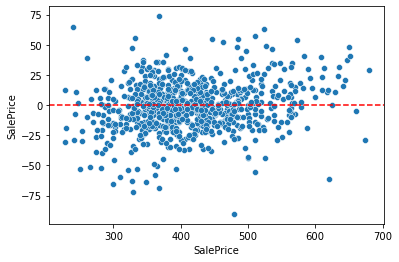

In [56]:
sns.scatterplot(x=y_test,y=test_res)
plt.axhline(y=0,color='red',linestyle='--');

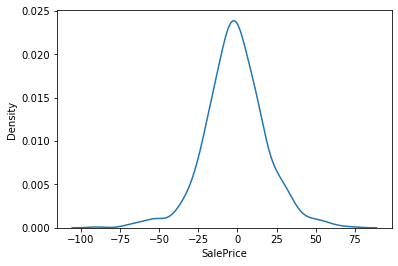

In [57]:
sns.kdeplot(test_res);

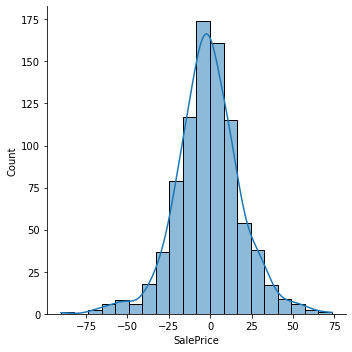

In [58]:
sns.displot(test_res,bins=20,kde=True);

**Test 3 - Probability Plot**

In [59]:
import scipy as sp

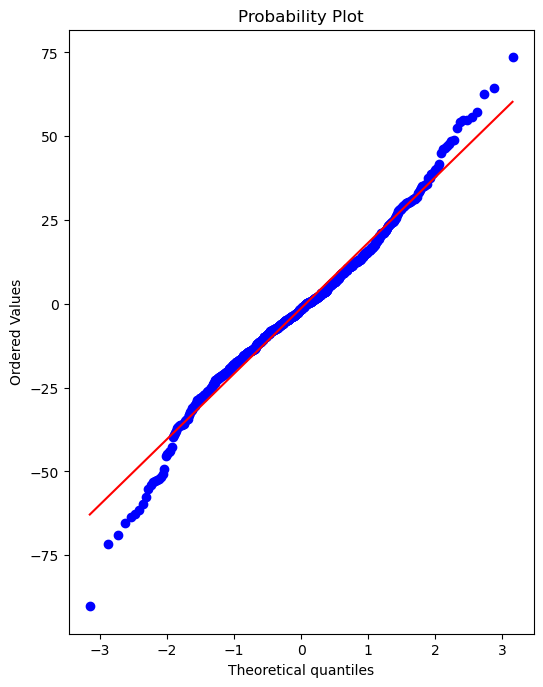

In [60]:
fig,ax=plt.subplots(figsize=(6,8),dpi=100)

_=sp.stats.probplot(test_res,plot=ax)


In [61]:
ridge_cv_model.coef_

array([ 6.77905217e-01,  3.75320757e+00,  5.16039742e-01, -5.13789620e-01,
        1.17806568e+01,  6.01123183e+00,  9.21718402e+00,  1.12857222e+00,
        2.93477749e+00, -2.75577295e+00,  5.43096976e-01, -5.72301827e+00,
       -8.10818695e-01, -3.77022195e+00,  6.64821127e+00,  1.86455967e+00,
       -1.01064487e+00,  6.66383682e+00, -2.07691781e+00, -2.07530989e-01,
        8.77267143e+00,  8.50631122e+00, -2.16069427e-02,  1.46104881e+01,
        1.74149718e+00,  6.48547289e-01,  2.45311609e+00,  2.01374887e+00,
       -1.88526699e+00, -4.75920949e-01, -3.36950273e+00,  1.32321066e+00,
        1.48904797e+00, -1.64609578e+00, -1.06672836e+00,  2.01207254e-01,
        3.75339431e+00,  3.13459494e+00, -2.98075884e+00,  7.91796607e-01,
        1.53107859e+00,  1.29796976e+00,  1.15664605e+00,  6.99652863e-01,
        2.11203470e+00, -1.45864389e-01,  5.08246976e-01,  1.66091151e-01,
       -7.92530592e-01, -4.21511505e-01,  1.01305758e-01, -2.17500573e-02,
        9.00004526e-01, -

In [62]:
x_train.shape

(1984, 232)

## MODEL 3 - ELASTIC NET REGULARIZATION

In [63]:
df=pd.read_csv('Ames_Housing_Clean_Data_no_remove_skew.csv')

## adjusting skewed feature

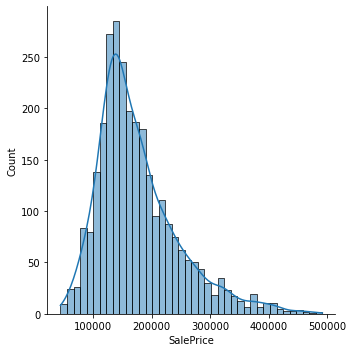

In [64]:
sns.displot(data=df,x='SalePrice',kde=True);

In [65]:
df['SalePrice'].skew()

1.226112963757501

In [66]:
df['SalePrice']=np.sqrt(df['SalePrice'])

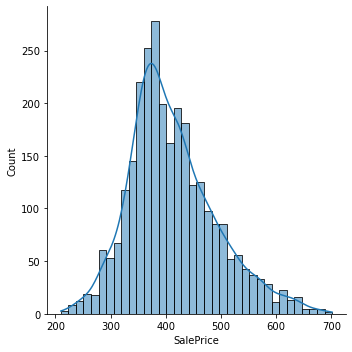

In [67]:
sns.displot(data=df,x='SalePrice',kde=True);

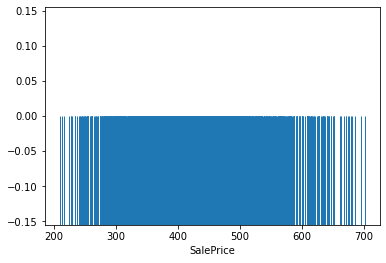

In [68]:
sns.rugplot(x='SalePrice',data=df,height=0.5);

# observe if there is any outliers within SalePrice itself so we had some information on which dataset to look on
# sale price above 700000 seems like an outliers

In [69]:
x=df.drop(['SalePrice'],axis=1)
y=df['SalePrice']

**Train | Test Split**

In [70]:
from sklearn.model_selection import train_test_split

In [71]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=101)

In [72]:
x_train

,Lot Frontage,Lot Area,Lot Shape,Land Slope,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,Exter Qual,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_VWD,SaleType_WD,SaleCond_AdjLand,SaleCond_Alloca,SaleCond_Family,SaleCond_Normal,SaleCond_Partial
2042,78.000000,9317,1,0,6,5,2006,2006,0.0,1,...,0,0,0,0,1,0,0,0,1,0
1920,40.000000,3880,0,0,5,9,1945,1997,0.0,2,...,0,0,0,0,1,0,0,0,1,0
938,78.870370,6853,1,0,8,5,2001,2002,136.0,1,...,0,0,0,0,1,0,0,0,1,0
824,67.000000,16285,2,0,7,5,2001,2002,0.0,1,...,0,0,0,0,1,0,0,0,1,0
90,25.000000,4835,1,0,7,5,2004,2005,0.0,1,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
599,80.000000,9600,0,0,5,7,1950,2007,0.0,1,...,0,0,0,0,1,0,0,0,1,0
1599,80.000000,11584,0,0,7,6,1979,1979,96.0,2,...,0,0,0,0,1,0,0,0,1,0
1361,85.176471,2887,0,0,6,5,1996,1997,0.0,2,...,0,0,0,0,1,0,0,0,1,0
1547,21.000000,1596,0,0,4,6,1973,1973,0.0,2,...,0,0,0,0,1,0,0,0,1,0


In [73]:
len(x_train)

1984

In [74]:
len(x_test)

851

**Create an Estimator**

In [75]:
from sklearn.linear_model import LinearRegression

In [76]:
model=LinearRegression()

In [77]:
model.fit(x_train,y_train)

LinearRegression()

In [78]:
test_pred=model.predict(x_test)

In [79]:
y_test

1234    398.748041
1249    396.862697
1871    339.116499
80      334.664011
917     273.861279
           ...    
759     287.228132
660     344.818793
2118    334.664011
1067    500.000000
38      539.389470
Name: SalePrice, Length: 851, dtype: float64

In [80]:
test_pred

array([406.40473058, 392.06261863, 345.78370682, 346.64430965,
       260.89633669, 394.74553435, 546.8262674 , 411.79957119,
       479.85013647, 366.4028896 , 422.45122315, 507.20743283,
       339.46542622, 362.07590764, 400.1377628 , 309.54701601,
       650.38065961, 275.93793671, 359.42535348, 372.73252216,
       487.78057027, 530.28977025, 367.77412139, 401.9467057 ,
       294.10734644, 484.05769457, 556.315236  , 314.57886446,
       412.67199843, 405.32754968, 379.68482793, 319.99693094,
       427.65686959, 369.51232194, 388.82069418, 474.76195519,
       604.33382899, 408.86016757, 284.071697  , 298.60262487,
       285.26309192, 302.31937172, 422.4736446 , 481.12301053,
       516.98408259, 450.04020476, 524.15420961, 374.60150601,
       354.87512181, 363.56086669, 496.66002734, 410.57095311,
       335.12530591, 388.15095671, 497.80256515, 439.22906782,
       291.60164626, 503.82440328, 467.030768  , 336.19571378,
       416.17839809, 405.08972567, 358.87019063, 369.84

**Test 1 - MAE, MSE, RMSE**

In [81]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [82]:
MAE=mean_absolute_error(y_test,test_pred)

MAE

14.738217719801344

In [83]:
MSE = mean_squared_error(y_test,test_pred)

MSE = MSE**2

MSE

152932.48110013394

In [84]:
RMSE= np.sqrt(MSE)

RMSE

391.0658270676868

In [85]:
#predict on train set

train_pred=model.predict(x_train)

MSE = mean_squared_error(y_train,train_pred)
MSE = MSE**2
RMSE= np.sqrt(MSE)
RMSE

339.78603927609964

 If the RMSE for the test set is much higher than that of the training set, it is likely that you've badly over fit the data, i.e. you've created a model that tests well in sample, but has little predictive value when tested out of sample.

In [86]:
df['SalePrice'].mean()**2

169955.60105924687

In [87]:
RMSE*100/df['SalePrice'].mean()**2

0.1999263555648569

4% percent of error percentage for predicting sales price

In [88]:
from sklearn.preprocessing import StandardScaler

In [89]:
scaler=StandardScaler()

In [90]:
scaler.fit(x_train)

StandardScaler()

In [91]:
x_train=scaler.transform(x_train)

In [92]:
x_test=scaler.transform(x_test)

In [93]:
from sklearn.linear_model import ElasticNetCV

In [94]:
elastic_model=ElasticNetCV(l1_ratio=[.1,.5,.7,.9,.95,.99,1],tol=0.01)

In [95]:
elastic_model.fit(x_train,y_train)

ElasticNetCV(l1_ratio=[0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1], tol=0.01)

In [96]:
elastic_model.l1_ratio_

1.0

In [97]:
test_pred=elastic_model.predict(x_test)

In [98]:
MAE=mean_absolute_error(y_test,test_pred)
MSE=mean_squared_error(y_test,test_pred)
RMSE=np.sqrt(MSE)

In [99]:
MAE

14.194304137428357

In [100]:
MSE = MSE**2

MSE

132720.28304544883

In [101]:
RMSE 

19.086852827019094

In [102]:
train_pred = elastic_model.predict(x_train)
MSE = mean_squared_error(y_train,train_pred)
MSE = MSE**2
RMSE= np.sqrt(MSE)
RMSE

356.9389417800175

In [103]:
df['SalePrice'].mean()**2

169955.60105924687

In [104]:
RMSE*100/df['SalePrice'].mean()**2

0.21001893409537462

5% percent of error percentage for predicting sales price

In [105]:
from sklearn.metrics import r2_score

In [106]:
accuracy= round(r2_score(y_test, test_pred), 2)

accuracy

0.94

**Test 2 - Residual Plot and Distribution Plot**

In [107]:
test_res=y_test-test_pred

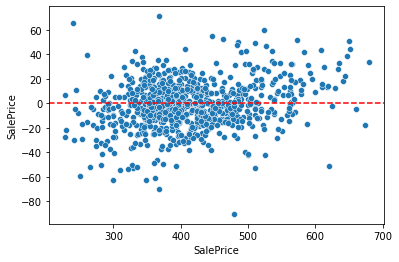

In [108]:
sns.scatterplot(x=y_test,y=test_res)
plt.axhline(y=0,color='red',linestyle='--');

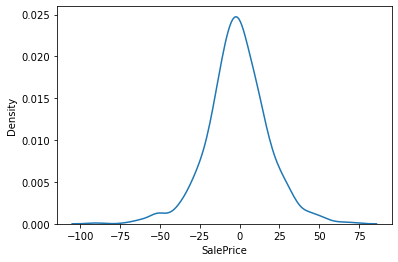

In [109]:
sns.kdeplot(test_res);

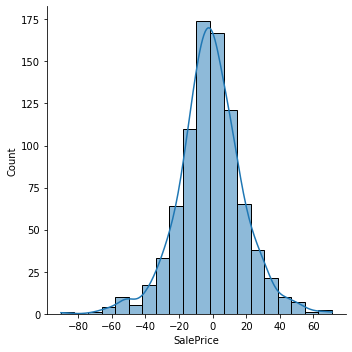

In [110]:
sns.displot(test_res,bins=20,kde=True);

**Test 3 - Probability Plot**

In [111]:
import scipy as sp

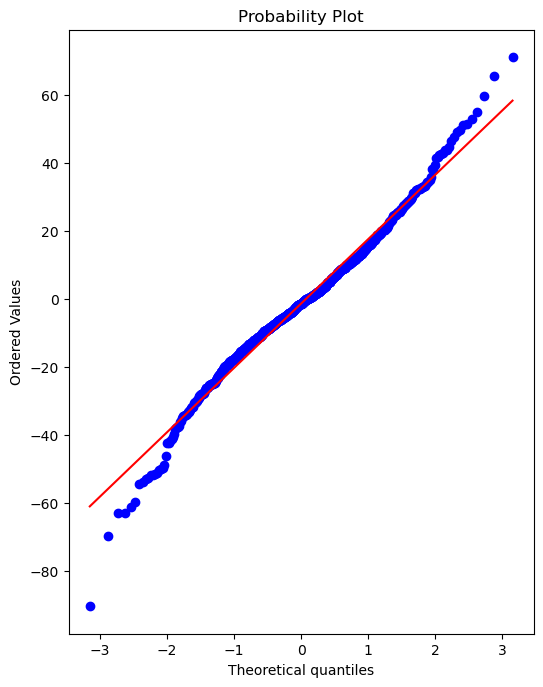

In [112]:
fig,ax=plt.subplots(figsize=(6,8),dpi=100)

_=sp.stats.probplot(test_res,plot=ax)


In [113]:
elastic_model.coef_

array([ 6.73170954e-01,  3.24465661e+00,  5.43030698e-01, -0.00000000e+00,
        1.35425155e+01,  5.87820644e+00,  1.01791823e+01,  1.27606225e+00,
        2.60486738e+00, -3.00357269e+00,  0.00000000e+00, -4.85148875e+00,
       -0.00000000e+00, -3.61476272e+00,  7.80200729e+00,  1.94204868e+00,
       -0.00000000e+00,  5.18173299e+00, -1.97834036e+00, -2.58650978e-01,
        1.22585097e+01,  1.10621980e+01,  0.00000000e+00,  1.15253149e+01,
        1.61958561e+00,  2.34946361e-01,  1.49150407e+00,  1.17229466e+00,
       -1.22100249e+00, -6.64971742e-01, -3.32602588e+00,  4.88437168e-01,
        1.63381491e+00, -1.55424448e+00, -5.39659082e-02, -0.00000000e+00,
        3.22278349e+00,  2.92162710e+00,  0.00000000e+00,  0.00000000e+00,
        1.30910759e+00,  1.10035745e+00,  9.27354965e-01,  3.29225096e-01,
        1.76701651e+00, -0.00000000e+00,  2.27649891e-01,  0.00000000e+00,
       -4.74293494e-01, -6.66951240e-02, -0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00,  

## MODEL 5 - GRID SEARCH CV

In [114]:
df=pd.read_csv('Ames_Housing_Clean_Data_no_remove_skew.csv')

## adjusting skewed feature

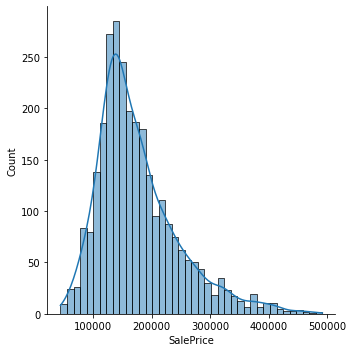

In [115]:
sns.displot(data=df,x='SalePrice',kde=True);

In [116]:
df['SalePrice'].skew()

1.226112963757501

In [117]:
df['SalePrice']=np.sqrt(df['SalePrice'])

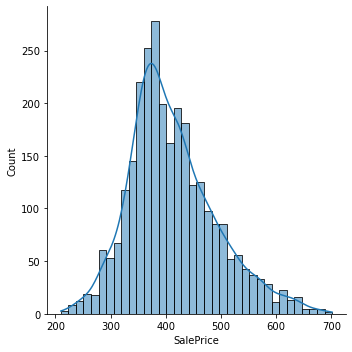

In [118]:
sns.displot(data=df,x='SalePrice',kde=True);

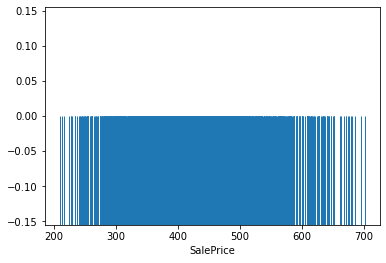

In [119]:
sns.rugplot(x='SalePrice',data=df,height=0.5);

# observe if there is any outliers within SalePrice itself so we had some information on which dataset to look on
# sale price above 700000 seems like an outliers

In [120]:
x=df.drop(['SalePrice'],axis=1)
y=df['SalePrice']

**Train | Test Split**

In [121]:
from sklearn.model_selection import train_test_split

In [122]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=101)

In [123]:
x_train

,Lot Frontage,Lot Area,Lot Shape,Land Slope,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,Exter Qual,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_VWD,SaleType_WD,SaleCond_AdjLand,SaleCond_Alloca,SaleCond_Family,SaleCond_Normal,SaleCond_Partial
2042,78.000000,9317,1,0,6,5,2006,2006,0.0,1,...,0,0,0,0,1,0,0,0,1,0
1920,40.000000,3880,0,0,5,9,1945,1997,0.0,2,...,0,0,0,0,1,0,0,0,1,0
938,78.870370,6853,1,0,8,5,2001,2002,136.0,1,...,0,0,0,0,1,0,0,0,1,0
824,67.000000,16285,2,0,7,5,2001,2002,0.0,1,...,0,0,0,0,1,0,0,0,1,0
90,25.000000,4835,1,0,7,5,2004,2005,0.0,1,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
599,80.000000,9600,0,0,5,7,1950,2007,0.0,1,...,0,0,0,0,1,0,0,0,1,0
1599,80.000000,11584,0,0,7,6,1979,1979,96.0,2,...,0,0,0,0,1,0,0,0,1,0
1361,85.176471,2887,0,0,6,5,1996,1997,0.0,2,...,0,0,0,0,1,0,0,0,1,0
1547,21.000000,1596,0,0,4,6,1973,1973,0.0,2,...,0,0,0,0,1,0,0,0,1,0


In [124]:
len(x_train)

1984

In [125]:
len(x_test)

851

**Create an Estimator**

In [126]:
from sklearn.linear_model import LinearRegression

In [127]:
model=LinearRegression()

In [128]:
model.fit(x_train,y_train)

LinearRegression()

In [129]:
test_pred=model.predict(x_test)

In [130]:
y_test

1234    398.748041
1249    396.862697
1871    339.116499
80      334.664011
917     273.861279
           ...    
759     287.228132
660     344.818793
2118    334.664011
1067    500.000000
38      539.389470
Name: SalePrice, Length: 851, dtype: float64

In [131]:
test_pred

array([406.40473058, 392.06261863, 345.78370682, 346.64430965,
       260.89633669, 394.74553435, 546.8262674 , 411.79957119,
       479.85013647, 366.4028896 , 422.45122315, 507.20743283,
       339.46542622, 362.07590764, 400.1377628 , 309.54701601,
       650.38065961, 275.93793671, 359.42535348, 372.73252216,
       487.78057027, 530.28977025, 367.77412139, 401.9467057 ,
       294.10734644, 484.05769457, 556.315236  , 314.57886446,
       412.67199843, 405.32754968, 379.68482793, 319.99693094,
       427.65686959, 369.51232194, 388.82069418, 474.76195519,
       604.33382899, 408.86016757, 284.071697  , 298.60262487,
       285.26309192, 302.31937172, 422.4736446 , 481.12301053,
       516.98408259, 450.04020476, 524.15420961, 374.60150601,
       354.87512181, 363.56086669, 496.66002734, 410.57095311,
       335.12530591, 388.15095671, 497.80256515, 439.22906782,
       291.60164626, 503.82440328, 467.030768  , 336.19571378,
       416.17839809, 405.08972567, 358.87019063, 369.84

**Test 1 - MAE, MSE, RMSE**

In [132]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [133]:
MAE=mean_absolute_error(y_test,test_pred)

MAE

14.738217719801344

In [134]:
MSE = mean_squared_error(y_test,test_pred)

MSE = MSE**2

MSE

152932.48110013394

In [135]:
RMSE= np.sqrt(MSE)

RMSE 

391.0658270676868

In [136]:
#predict on train set

train_pred=model.predict(x_train)

MSE = mean_squared_error(y_train,train_pred)
MSE = MSE**2
RMSE= np.sqrt(MSE)
RMSE

339.78603927609964

 If the RMSE for the test set is much higher than that of the training set, it is likely that you've badly over fit the data, i.e. you've created a model that tests well in sample, but has little predictive value when tested out of sample.

In [137]:
df['SalePrice'].mean()**2

169955.60105924687

In [138]:
RMSE*100/df['SalePrice'].mean()**2

0.1999263555648569

4% percent of error percentage for predicting sales price

In [139]:
from sklearn.metrics import r2_score

In [140]:
accuracy= round(r2_score(y_test, test_pred), 2)

accuracy

0.94

In [141]:
from sklearn.preprocessing import StandardScaler

In [142]:
scaler=StandardScaler()

In [143]:
scaler.fit(x_train)

StandardScaler()

In [144]:
x_train=scaler.transform(x_train)

In [145]:
x_test=scaler.transform(x_test)

In [146]:
from sklearn.linear_model import ElasticNet

In [147]:
base_elastic_model = ElasticNet()

In [148]:
param_grid = {'alpha':[0.1,1,5,10,50,100],
              'l1_ratio':[.1, .5, .7, .9, .95, .99, 1]}

In [172]:
from sklearn.model_selection import GridSearchCV

# import GridSearchCV

In [173]:
# verbose number a personal preference

grid_model = GridSearchCV(estimator=base_elastic_model,
                          param_grid=param_grid,
                          scoring='neg_mean_squared_error',
                          cv=5,
                          verbose=2)

#cv value = maximum value can be same number of features

In [174]:
grid_model.fit(x_train,y_train)

Fitting 5 folds for each of 42 candidates, totalling 210 fits
[CV] alpha=0.1, l1_ratio=0.1 .........................................
[CV] .......................... alpha=0.1, l1_ratio=0.1, total=   0.1s
[CV] alpha=0.1, l1_ratio=0.1 .........................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] .......................... alpha=0.1, l1_ratio=0.1, total=   0.1s
[CV] alpha=0.1, l1_ratio=0.1 .........................................
[CV] .......................... alpha=0.1, l1_ratio=0.1, total=   0.1s
[CV] alpha=0.1, l1_ratio=0.1 .........................................
[CV] .......................... alpha=0.1, l1_ratio=0.1, total=   0.1s
[CV] alpha=0.1, l1_ratio=0.1 .........................................
[CV] .......................... alpha=0.1, l1_ratio=0.1, total=   0.1s
[CV] alpha=0.1, l1_ratio=0.5 .........................................
[CV] .......................... alpha=0.1, l1_ratio=0.5, total=   0.1s
[CV] alpha=0.1, l1_ratio=0.5 .........................................
[CV] .......................... alpha=0.1, l1_ratio=0.5, total=   0.1s
[CV] alpha=0.1, l1_ratio=0.5 .........................................
[CV] .......................... alpha=0.1, l1_ratio=0.5, total=   0.1s
[CV] alpha=0.1, l1_ratio=0.5 .........................................
[CV] .

[CV] ........................... alpha=1, l1_ratio=0.99, total=   0.1s
[CV] alpha=1, l1_ratio=0.99 ..........................................
[CV] ........................... alpha=1, l1_ratio=0.99, total=   0.1s
[CV] alpha=1, l1_ratio=0.99 ..........................................
[CV] ........................... alpha=1, l1_ratio=0.99, total=   0.0s
[CV] alpha=1, l1_ratio=0.99 ..........................................
[CV] ........................... alpha=1, l1_ratio=0.99, total=   0.1s
[CV] alpha=1, l1_ratio=0.99 ..........................................
[CV] ........................... alpha=1, l1_ratio=0.99, total=   0.1s
[CV] alpha=1, l1_ratio=1 .............................................
[CV] .............................. alpha=1, l1_ratio=1, total=   0.0s
[CV] alpha=1, l1_ratio=1 .............................................
[CV] .............................. alpha=1, l1_ratio=1, total=   0.0s
[CV] alpha=1, l1_ratio=1 .............................................
[CV] .

[CV] alpha=10, l1_ratio=0.7 ..........................................
[CV] ........................... alpha=10, l1_ratio=0.7, total=   0.0s
[CV] alpha=10, l1_ratio=0.9 ..........................................
[CV] ........................... alpha=10, l1_ratio=0.9, total=   0.0s
[CV] alpha=10, l1_ratio=0.9 ..........................................
[CV] ........................... alpha=10, l1_ratio=0.9, total=   0.1s
[CV] alpha=10, l1_ratio=0.9 ..........................................
[CV] ........................... alpha=10, l1_ratio=0.9, total=   0.0s
[CV] alpha=10, l1_ratio=0.9 ..........................................
[CV] ........................... alpha=10, l1_ratio=0.9, total=   0.0s
[CV] alpha=10, l1_ratio=0.9 ..........................................
[CV] ........................... alpha=10, l1_ratio=0.9, total=   0.0s
[CV] alpha=10, l1_ratio=0.95 .........................................
[CV] .......................... alpha=10, l1_ratio=0.95, total=   0.0s
[CV] a

[CV] .......................... alpha=100, l1_ratio=0.1, total=   0.0s
[CV] alpha=100, l1_ratio=0.1 .........................................
[CV] .......................... alpha=100, l1_ratio=0.1, total=   0.0s
[CV] alpha=100, l1_ratio=0.5 .........................................
[CV] .......................... alpha=100, l1_ratio=0.5, total=   0.0s
[CV] alpha=100, l1_ratio=0.5 .........................................
[CV] .......................... alpha=100, l1_ratio=0.5, total=   0.0s
[CV] alpha=100, l1_ratio=0.5 .........................................
[CV] .......................... alpha=100, l1_ratio=0.5, total=   0.0s
[CV] alpha=100, l1_ratio=0.5 .........................................
[CV] .......................... alpha=100, l1_ratio=0.5, total=   0.0s
[CV] alpha=100, l1_ratio=0.5 .........................................
[CV] .......................... alpha=100, l1_ratio=0.5, total=   0.0s
[CV] alpha=100, l1_ratio=0.7 .........................................
[CV] .

[Parallel(n_jobs=1)]: Done 210 out of 210 | elapsed:   11.0s finished


GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [0.1, 1, 5, 10, 50, 100],
                         'l1_ratio': [0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1]},
             scoring='neg_mean_squared_error', verbose=2)

In [175]:
grid_model.best_estimator_

ElasticNet(alpha=0.1, l1_ratio=0.7)

In [176]:
grid_model.best_params_

{'alpha': 0.1, 'l1_ratio': 0.7}

In [177]:
 pd.DataFrame(grid_model.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,param_l1_ratio,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.093183,0.003174,0.001395,4.862832e-04,0.1,0.1,"{'alpha': 0.1, 'l1_ratio': 0.1}",-461.178229,-438.406269,-504.878457,-453.508120,-475.920008,-466.778217,22.572653,7
1,0.079297,0.002667,0.001395,4.849856e-04,0.1,0.5,"{'alpha': 0.1, 'l1_ratio': 0.5}",-458.351576,-436.867377,-495.526028,-451.216484,-470.209069,-462.434107,19.756948,4
2,0.081811,0.010267,0.001796,3.994476e-04,0.1,0.7,"{'alpha': 0.1, 'l1_ratio': 0.7}",-458.419782,-437.551980,-490.430897,-451.191498,-468.526807,-461.224193,17.749665,1
3,0.128267,0.013397,0.000824,4.151341e-04,0.1,0.9,"{'alpha': 0.1, 'l1_ratio': 0.9}",-460.898975,-440.910423,-487.067914,-452.550902,-467.751871,-461.836017,15.470086,2
4,0.219821,0.045642,0.003190,2.917465e-03,0.1,0.95,"{'alpha': 0.1, 'l1_ratio': 0.95}",-462.203560,-441.651567,-485.735187,-453.453773,-468.427457,-462.294309,14.774142,3
5,0.213667,0.048960,0.001223,3.869435e-04,0.1,0.99,"{'alpha': 0.1, 'l1_ratio': 0.99}",-463.808818,-441.907266,-484.153664,-454.730986,-468.530442,-462.626235,14.080476,5
6,0.188496,0.018538,0.001174,4.138896e-04,0.1,1,"{'alpha': 0.1, 'l1_ratio': 1}",-464.110490,-441.881856,-483.534792,-455.103197,-468.708416,-462.667750,13.880061,6
7,0.031690,0.002853,0.001395,4.861062e-04,1,0.1,"{'alpha': 1, 'l1_ratio': 0.1}",-546.038148,-556.299254,-674.105833,-533.154067,-595.802786,-581.080018,51.008779,14
8,0.037121,0.006313,0.001200,4.590879e-04,1,0.5,"{'alpha': 1, 'l1_ratio': 0.5}",-513.655647,-507.592520,-619.425951,-493.210973,-546.188969,-536.014812,45.168261,13
9,0.065998,0.032795,0.004388,4.833013e-03,1,0.7,"{'alpha': 1, 'l1_ratio': 0.7}",-498.881482,-484.305574,-588.149264,-479.455526,-526.564246,-515.471218,39.871796,12


In [178]:
test_pred = grid_model.predict(x_test)

In [179]:
from sklearn.metrics import mean_squared_error

In [180]:
MAE = mean_absolute_error(y_test,test_pred)

MAE

14.400338886454048

In [181]:
MSE=mean_squared_error(y_test,test_pred)

MSE = MSE**2

MSE

142790.08649653566

In [182]:
RMSE=np.sqrt(MSE)
RMSE

377.8757553701159

In [183]:
#predict on train set

train_pred=grid_model.predict(x_train)

MSE = mean_squared_error(y_train,train_pred)
MSE = MSE**2
RMSE= np.sqrt(MSE)
RMSE

350.20169705984057

In [184]:
df['SalePrice'].mean()**2

169955.60105924687

In [185]:
RMSE*100/df['SalePrice'].mean()**2

0.20605481365557324

In [186]:
4**2

16

5% percent of error percentage for predicting sales price

In [164]:
from sklearn.metrics import r2_score

In [165]:
accuracy= round(r2_score(y_test, test_pred), 2)

accuracy

0.94

**Test 2 - Residual Plot and Distribution Plot**

In [166]:
test_res=y_test-test_pred

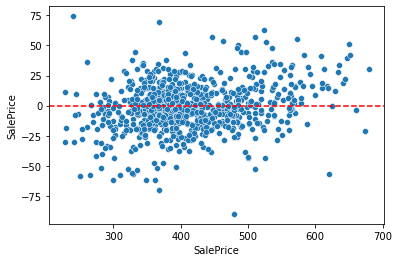

In [167]:
sns.scatterplot(x=y_test,y=test_res)
plt.axhline(y=0,color='red',linestyle='--');

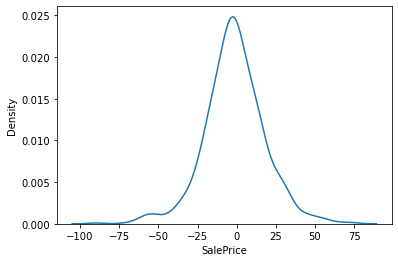

In [168]:
sns.kdeplot(test_res);

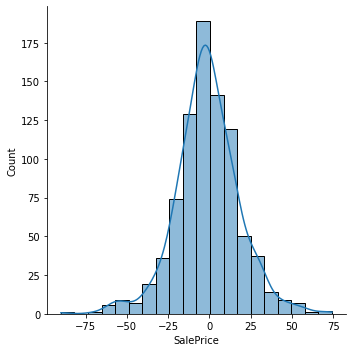

In [169]:
sns.displot(test_res,bins=20,kde=True);

**Test 3 - Probability Plot**

In [170]:
import scipy as sp

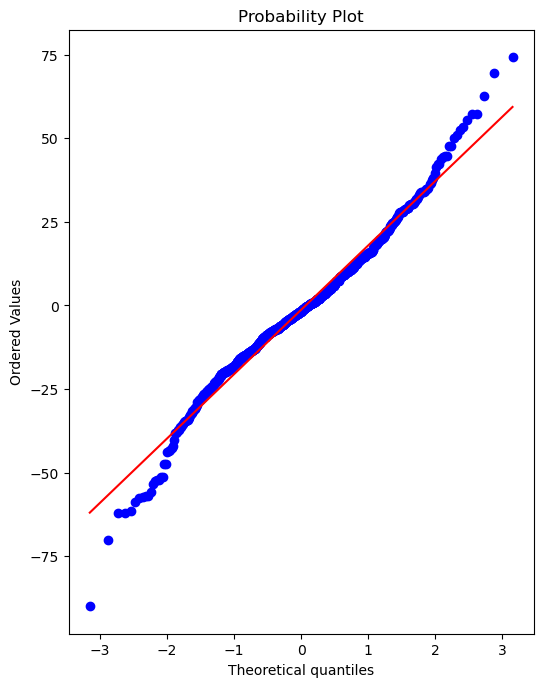

In [171]:
fig,ax=plt.subplots(figsize=(6,8),dpi=100)

_=sp.stats.probplot(test_res,plot=ax)
